#### 监督学习——分类
1. 混淆矩阵
2. 正样本
    * 精准率
    * 召回率
3. 负样本
3. 分类准确率
4. 分类器评估指标


#### K近邻算法（KNN）
1. 欧拉距离 
    $$d(x,y)=\sqrt{\sum_{i=1}^n(x_i-y_i)^2}$$
2. 明可夫斯基距离 
    $$d(x,y)=\sqrt{\sum_{i=1}^n|x_i-y_i|^p}$$
3. 曼哈顿距离 
    $$d(x,y)=\sum_{i=1}^n|x_i-y_i|$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

raw_data_X = [
    [3.39, 2.33],
    [1.34, 1.78],
    [3.92, 4.21],
    [2.67, 2.08],
    [6.22, 4.79],
    [5.74, 5.53],
    [9.17, 7.90],
    [7.87, 4.11],
    [7.87, 5.59],
    [6.85, 0.69]
]

raw_data_y = [0,0,0,0,0,1,1,1,1,1]

X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

print(X_train)

# 引入具体算法
from sklearn.neighbors import KNeighborsClassifier

# 实例化分类器
knn_clf = KNeighborsClassifier(n_neighbors=3)
# 训练模型
knn_clf.fit(X_train, y_train)
score = knn_clf.score(X_train, y_train)
print("准确率:", score)

# 预测
x = np.array([4.5, 3.5])
X_pred = x.reshape(1, -1)
y_pred = knn_clf.predict(X_pred)
print("预测结果:", y_pred)
print("准确率:", knn_clf.score(X_pred, y_pred))

# 可视化
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_pred[0][0], X_pred[0][1], c='r', marker='x')
plt.show()

[[3.39 2.33]
 [1.34 1.78]
 [3.92 4.21]
 [2.67 2.08]
 [6.22 4.79]
 [5.74 5.53]
 [9.17 7.9 ]
 [7.87 4.11]
 [7.87 5.59]
 [6.85 0.69]]
准确率: 0.9
预测结果: [0]
准确率: 1.0


In [ ]:
# 手写体数据集
import matplotlib
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
digits = datasets.load_digits()

X = digits.data
y = digits.target

# 查看手写数字
print(y[200])
some_digit = X[200]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
# 训练模型
# 创建一个KNeighborsClassifier分类器，并设置k=3
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
# 预测测试集
y_pred = knn_clf.predict(X_test)
# 评估模型
print("训练得分:", knn_clf.score(X_train, y_train))
print("预测得分:", knn_clf.score(X_test, y_test))  # score()方法返回模型在测试集上的准确率,接收两个参数：测试集的特征和标签(正确答案)
# 评估模型
from sklearn.metrics import accuracy_score
print("准确率:", accuracy_score(y_test, y_pred))

#### 交叉验证（Cross-Validation, CV）

In [ ]:
# K-FOLDS 交叉验证
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# 生成示例数据
X, y = make_regression(n_samples=1000, n_features=100, noise=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 LassoCV（默认使用 5-Fold CV）
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5, random_state=42)

# 拟合模型（会自动选择最佳 alpha）
lasso_cv.fit(X_train, y_train)

# 输出最佳 alpha
print("最佳 alpha:", lasso_cv.alpha_)

# 评估模型
print("训练集 R²:", lasso_cv.score(X_train, y_train))
print("测试集 R²:", lasso_cv.score(X_test, y_test))

# 查看被压缩为 0 的权重数量
print("被压缩为 0 的权重数量:", sum(lasso_cv.coef_ == 0))

#### 交叉验证&网格搜索

In [39]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
sk_cnn_clf = KNeighborsClassifier(n_neighbors=4, weights='uniform')

sk_cnn_clf.fit(X_train, y_train)
y_pred = sk_cnn_clf.predict(X_test)
print("测试集得分：",sk_cnn_clf.score(X_test, y_test))

param_grid = [
    {
        # 搜索第一组参数
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1, 6)]
    },
    {
        # 搜索第二组参数
        'weights':['distance'],
        'n_neighbors':[i for i in range(1, 6)],
        'p':[i for i in range(1, 6)]
    }
]

knn_clf = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV # 网格搜索
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
print(grid_search)
grid_search.fit(X_train, y_train)
knn_clf = grid_search.best_estimator_

print("最优得分：",grid_search.best_score_)
print("最优参数：",grid_search.best_params_)
print("测试集得分：",knn_clf.score(X_test, y_test))

测试集得分： 0.9916666666666667
GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2, 3, 4, 5],
                          'weights': ['distance']}])
最优得分： 0.9860820751064653
最优参数： {'n_neighbors': 1, 'weights': 'uniform'}
测试集得分： 0.9833333333333333


#### boston房价预测

C:\Users\Man\AppData\Local\Temp\ipykernel_15920\2786971775.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  boston = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)


原始数据形状: (506, 13)
训练集形状: (404, 13)
测试集形状: (102, 13)

===== 岭回归 =====
最佳 alpha: 0.0001
训练集 R²: 0.7448
测试集 R²: 0.7023
测试集 MSE: 19.0469
测试集 MAE: 3.3607

===== Lasso回归 =====
最佳 alpha: 0.0060
训练集 R²: 0.7447
测试集 R²: 0.7007
测试集 MSE: 19.1484
测试集 MAE: 3.3509
被压缩为0的特征数量: 0


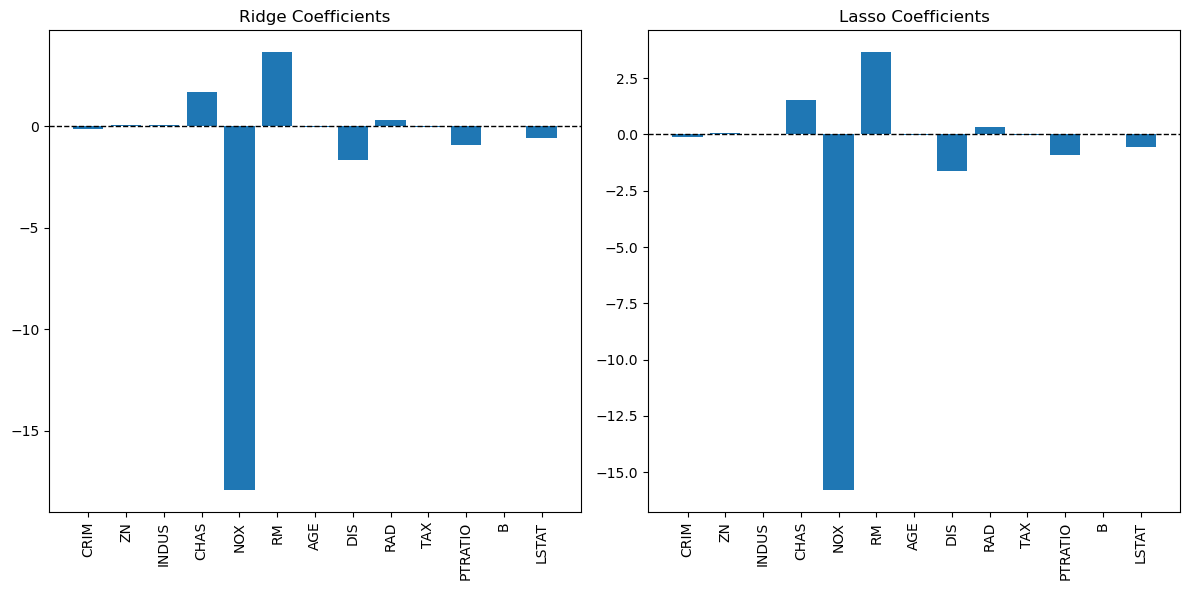

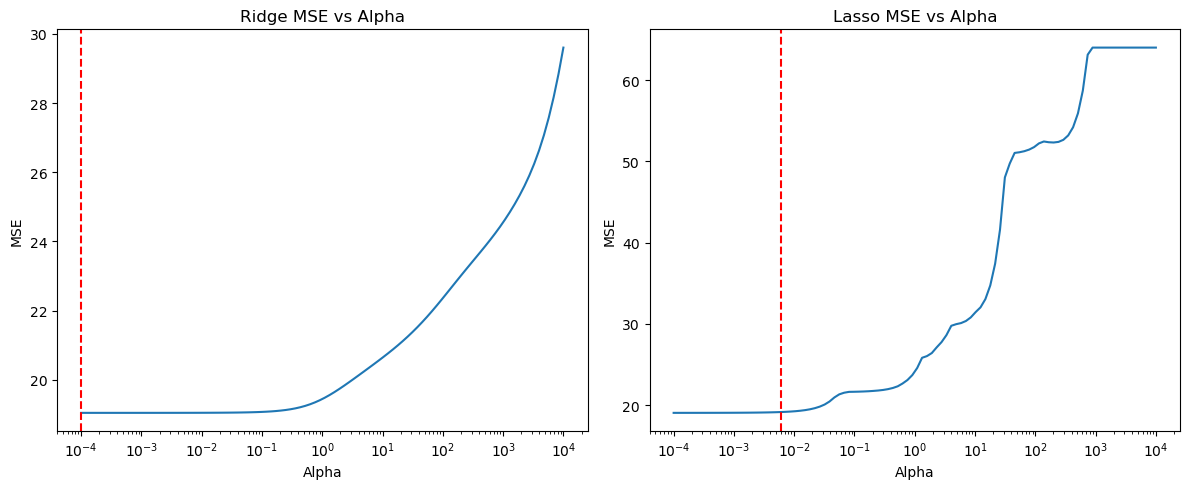

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 加载波士顿数据集
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
boston = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# 提取特征和目标值
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

# 打印数据形状
print("原始数据形状:", X.shape)
print("训练集形状:", X_train.shape)
print("测试集形状:", X_test.shape)

# 定义交叉验证的超参数范围
alphas = np.logspace(-4, 4, 100)  # 从10^-4到10^4的等比数列

# ====================== 岭回归 ======================
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
ridge_best_alpha = ridge_cv.alpha_
ridge_model = Ridge(alpha=ridge_best_alpha)
ridge_model.fit(X_train, y_train)

# 岭回归评估
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)

print("\n===== 岭回归 =====")
print(f"最佳 alpha: {ridge_best_alpha:.4f}")
print(f"训练集 R²: {ridge_model.score(X_train, y_train):.4f}")
print(f"测试集 R²: {ridge_model.score(X_test, y_test):.4f}")
print(f"测试集 MSE: {ridge_test_mse:.4f}")
print(f"测试集 MAE: {mean_absolute_error(y_test, ridge_test_pred):.4f}")

# ====================== Lasso回归 ======================
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)
lasso_best_alpha = lasso_cv.alpha_
lasso_model = Lasso(alpha=lasso_best_alpha)
lasso_model.fit(X_train, y_train)

# Lasso回归评估
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

print("\n===== Lasso回归 =====")
print(f"最佳 alpha: {lasso_best_alpha:.4f}")
print(f"训练集 R²: {lasso_model.score(X_train, y_train):.4f}")
print(f"测试集 R²: {lasso_model.score(X_test, y_test):.4f}")
print(f"测试集 MSE: {lasso_test_mse:.4f}")
print(f"测试集 MAE: {mean_absolute_error(y_test, lasso_test_pred):.4f}")
print(f"被压缩为0的特征数量: {sum(lasso_model.coef_ == 0)}")

# ====================== 绘制系数对比图 ======================
plt.figure(figsize=(12, 6))

# 岭回归系数
plt.subplot(1, 2, 1)
plt.bar(range(X.shape[1]), ridge_model.coef_)
plt.xticks(range(X.shape[1]), columns[:-1], rotation=90)
plt.title("Ridge Coefficients")
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Lasso回归系数
plt.subplot(1, 2, 2)
plt.bar(range(X.shape[1]), lasso_model.coef_)
plt.xticks(range(X.shape[1]), columns[:-1], rotation=90)
plt.title("Lasso Coefficients")
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

# ====================== 绘制MSE随alpha变化图 ======================
# 岭回归MSE随alpha变化
ridge_mse_path = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_mse_path.append(mean_squared_error(y_test, ridge.predict(X_test)))

# Lasso回归MSE随alpha变化
lasso_mse_path = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_mse_path.append(mean_squared_error(y_test, lasso.predict(X_test)))

plt.figure(figsize=(12, 5))

# 岭回归MSE
plt.subplot(1, 2, 1)
plt.semilogx(alphas, ridge_mse_path)
plt.axvline(ridge_best_alpha, color='r', linestyle='--')
plt.title("Ridge MSE vs Alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")

# Lasso回归MSE
plt.subplot(1, 2, 2)
plt.semilogx(alphas, lasso_mse_path)
plt.axvline(lasso_best_alpha, color='r', linestyle='--')
plt.title("Lasso MSE vs Alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")

plt.tight_layout()
plt.show()

C:\Users\Man\AppData\Local\Temp\ipykernel_15920\2892050229.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  boston = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)


原始数据形状: (506, 13)
训练集形状: (404, 13)
测试集形状: (102, 13)

===== KNN回归最佳参数 =====
最佳参数: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
交叉验证最佳得分(MSE): 19.6780
训练集 R²: 1.0000
测试集 R²: 0.8588
测试集 MSE: 9.0344
测试集 MAE: 2.1599


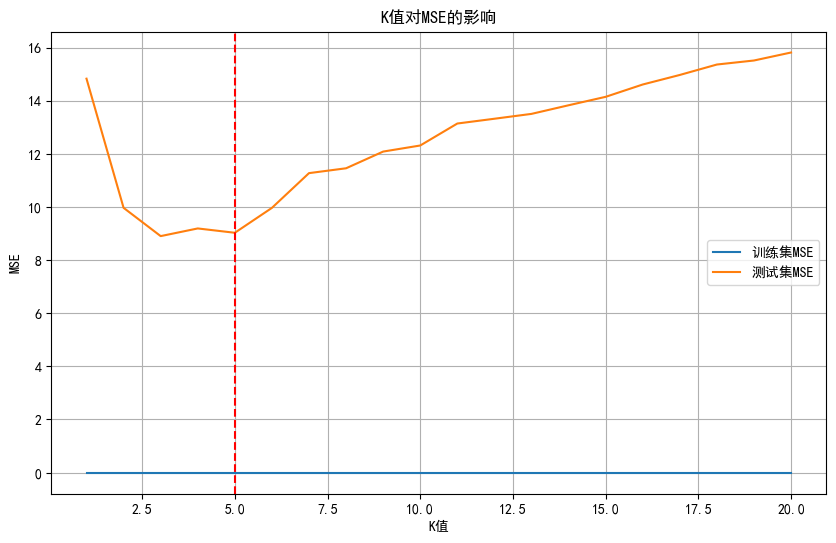

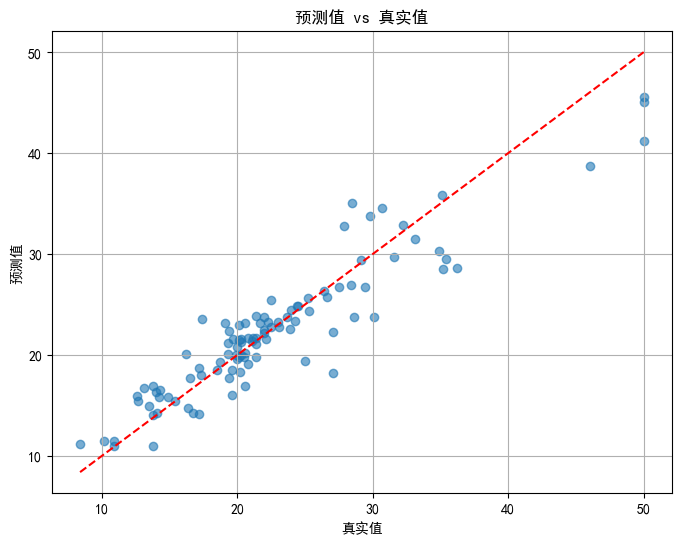

In [ ]:
# KNN回归
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号

# 加载波士顿数据集
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
boston = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# 提取特征和目标值
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

# 数据标准化（KNN对尺度敏感）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=999
)

# ====================== KNN回归 ======================
# 定义参数网格
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1:曼哈顿距离，2:欧氏距离
}

# 网格搜索
knn = KNeighborsRegressor()
grid_search = GridSearchCV(
    knn, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_knn = grid_search.best_estimator_

# 评估结果
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print("\n===== KNN回归最佳参数 =====")
print(f"最佳参数: {grid_search.best_params_}")
print(f"交叉验证最佳得分(MSE): {-grid_search.best_score_:.4f}")
print(f"训练集 R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"测试集 R²: {r2_score(y_test, y_test_pred):.4f}")
print(f"测试集 MSE: {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"测试集 MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")

# ====================== 可视化分析 ======================
# 1. 不同k值的影响（固定其他参数）
k_values = np.arange(1, 21)
train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsRegressor(
        n_neighbors=k,
        weights=grid_search.best_params_['weights'],
        p=grid_search.best_params_['p']
    )
    knn.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, knn.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, knn.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label="训练集MSE")
plt.plot(k_values, test_errors, label="测试集MSE")
plt.axvline(grid_search.best_params_['n_neighbors'], color='r', linestyle='--')
plt.title("K值对MSE的影响")
plt.xlabel("K值")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

# 2. 预测值与真实值对比
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("预测值 vs 真实值")
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.grid()
plt.show()